# Convex Optimization Exercise 3_9

Dr. Amirmazlaghani

By Gholamreza Dar 400131018

Spring 2022

## Imports

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style('dark')

import cvxpy as cvx

In [49]:
m = 300
n = 100
A = np.random.rand(m,n)
b = A@np.ones((n,1))/2
c = -np.random.rand(n, 1)


In [50]:
# Solve equation 2
x = cvx.Variable((n,1))
objective = cvx.Minimize(c.T@x)
constraints = [A@x <= b, x>=0, x<=1]
prob = cvx.Problem(objective, constraints)
prob.solve()
L = prob.value
print("Optimal value: ", prob.value)
print("X_rlx solution:\n", x.value.round(7))
x_rlx = x.value

Optimal value:  -34.58971131665731
X_rlx solution:
 [[0.3602951]
 [1.       ]
 [1.       ]
 [0.       ]
 [0.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [0.7180642]
 [1.       ]
 [1.       ]
 [0.       ]
 [1.       ]
 [0.3550533]
 [0.       ]
 [0.       ]
 [1.       ]
 [1.       ]
 [0.       ]
 [0.       ]
 [0.5609413]
 [1.       ]
 [0.       ]
 [1.       ]
 [0.       ]
 [0.       ]
 [0.356729 ]
 [0.3179544]
 [0.       ]
 [0.3653983]
 [0.       ]
 [1.       ]
 [0.       ]
 [1.       ]
 [1.       ]
 [0.320754 ]
 [0.       ]
 [1.       ]
 [1.       ]
 [0.       ]
 [1.       ]
 [0.2698927]
 [0.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [0.       ]
 [0.       ]
 [1.       ]
 [0.       ]
 [0.       ]
 [1.       ]
 [1.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [0.6344887]
 [0.1481277]
 [0.       ]
 [0.       ]
 [1.       ]
 [0.       ]
 [0.       ]
 [0.9096809]
 [1.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.4902117]

In [51]:
np.random.seed(1)

In [52]:
# Generate 100 t values between 0 and 1
N = 100
t_values = np.linspace(0, 1, N)
max_values = np.zeros(N)
u_values = np.zeros(N)

feasible_Us = []

for i in range(N):
    t = t_values[i]
    
    # Calculate x_hat based on x_rlx (x_hat is binary)
    x_hat = (x_rlx>t).astype(float)

    # Calculate upperbound
    u = c.T@x_hat

    # Calculate maximum element of AX-b (X=x_hat)
    max_val = np.max(A@x_hat-b)

    if max_val<=0:
        feasible_Us.append(u)

    # save the maximum value and the corresponding u
    max_values[i] = max_val
    u_values[i] = u.flatten()[0]


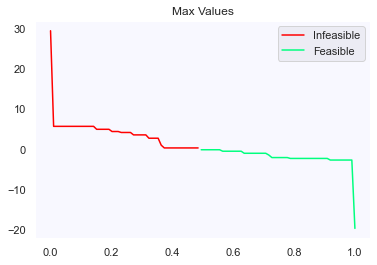

In [53]:
plt.figure().patch.set_facecolor('white')
plt.gca().set_facecolor('ghostwhite')

plt.plot(t_values[max_values>0], max_values[max_values>0], label='Infeasible', c='red')
plt.plot(t_values[max_values<=0], max_values[max_values<=0], label='Feasible', c='springgreen')

plt.title("Max Values")
plt.legend()
plt.show()

In [59]:
U

-33.88368852196696

In [58]:
U-L

0.7060227946903481